In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams['figure.facecolor'] = 'w'
plt.style.use(['dark_background', 'science', 'notebook'])

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

In [67]:
# generate data
def function(x):
    # return -1 + 5*x - 25*x**2 + 2*x**3
    return 6 -8*x + 3*x**2 + 2*x**3

df = pd.DataFrame()
n_samples = 10
xmin, xmax = -2.5, 2
np.random.seed(421)
df['x'] = np.random.uniform(low=xmin, high=xmax, size=(n_samples,))
df['y'] = function(df['x']) + np.random.uniform(-1,1, size=(n_samples,))
X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)

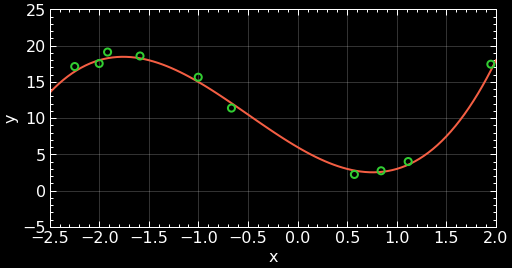

In [68]:
fig, ax = plt.subplots(figsize=(8, 4))
ymin, ymax = -5, 25
x = np.linspace(xmin, xmax, 100)

ax.plot(x, function(x), c='tomato', lw=2, alpha=0.96, )
ax.scatter(X, Y, s=50, ec='limegreen', fc='none', lw=2, zorder=5)
ax.set(xlabel='x', ylabel='y', #title=f'{sequence}', 
       xlim=[xmin,xmax], ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y_znorm = scaler.fit_transform(Y)

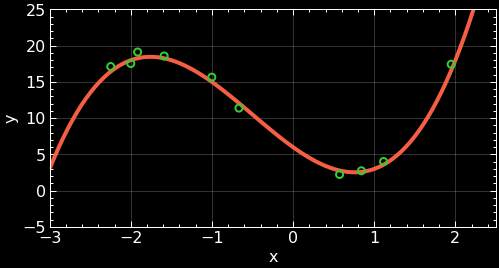

In [72]:
fig, ax = plt.subplots(figsize=(8, 4))
xmin, xmax = -3, 2.5
ymin, ymax = -5, 25
x = np.linspace(xmin, xmax, 100)

ax.plot(x, function(x), c='tomato', lw=4, alpha=0.96, )
ax.scatter(X, Y, s=50, ec='limegreen', fc='none', lw=2, zorder=5)
# ax.plot(x, (function(x)-scaler.mean_)/scaler.scale_, c='tomato', lw=4, alpha=0.96, )
# ax.scatter(X, Y_znorm, s=50, ec='limegreen', fc='none', lw=2, zorder=5)
ax.set(xlabel='x', ylabel='y', #title=f'{sequence}', 
       xlim=[xmin,xmax], ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0)

In [79]:
kernel = ConstantKernel(10, (1e-3, 1e5)) * RBF(length_scale=1, length_scale_bounds=(1e-3, 1e5))
# kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
model.fit(X, Y)
x_axis = np.linspace(xmin, xmax, 100).reshape(-1, 1)
yhat, sigma = model.predict(x_axis, return_std=True)

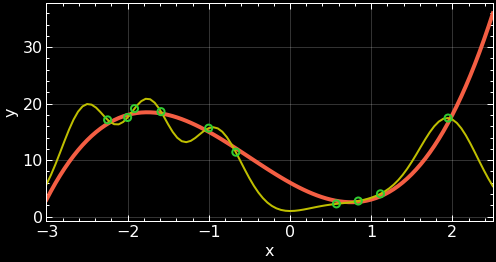

In [80]:
fig, ax = plt.subplots(figsize=(8, 4))
# ymin, ymax = -10, 20
x = np.linspace(xmin, xmax, 100)

ax.plot(x, function(x), c='tomato', lw=4, alpha=0.96, )
ax.scatter(X, Y, s=50, ec='limegreen', fc='none', lw=2, zorder=5)
ax.plot(x_axis, yhat, c='y', lw=2)
ax.set(xlabel='x', ylabel='y', #title=f'{sequence}', 
       xlim=[xmin,xmax])#, ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0)

In [78]:
np.random.seed(1)
def f(x):
    """The function to predict."""
    # return 5+np.sin(x)*np.exp(-x/5)
    return function(x)

#  First the noiseless case
# X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T
X = np.atleast_2d([1., 3., 12]).T

# Observations
y = f(X).ravel()

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 15, 1000)).T

# Instantiate a Gaussian Process model
kernel = ConstantKernel(1.0, (1e-3, 1e5)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

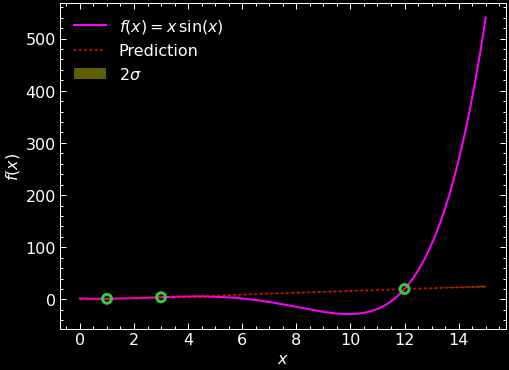

In [79]:
plt.figure()
plt.plot(x, f(x), 'magenta', label=u'$f(x) = x\,\sin(x)$')
plt.scatter(X, y, s=80, ec='limegreen', fc='none', lw=3, zorder=5)
# plt.plot(X, y, 'ro', markersize=10, label=u'Observations')
plt.plot(x, y_pred, 'r:', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 2 * sigma,
                        (y_pred + 2 * sigma)[::-1]]),
         alpha=.5, fc='y', ec='None', label=r'$2\sigma$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$');
# plt.xlim(-10, 20)
plt.legend(loc='best');

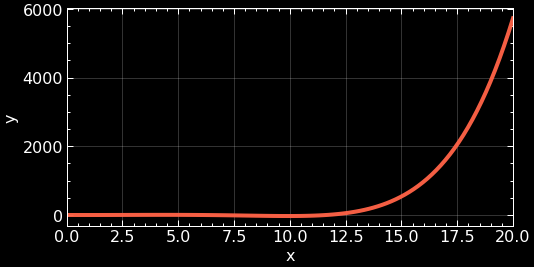

In [80]:
fig, ax = plt.subplots(figsize=(8, 4))
xmin, xmax = 0, 20
x = np.linspace(xmin, xmax, 100)

ax.plot(x, f(x), c='tomato', lw=4, alpha=0.96, )
# ax.scatter(X, Y_znorm, s=50, ec='limegreen', fc='none', lw=2, zorder=5)
ax.set(xlabel='x', ylabel='y', #title=f'{sequence}', 
       xlim=[xmin,xmax])#, ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0)

In [193]:
# generate data
def function(x):
    # return -1 + 5*x - 25*x**2 + 2*x**3
    return 0.9*x**2 - 0.15*x**3 - 0.002*x**5 + 0.0002*x**6 + 0.5*(x-2)**2

df = pd.DataFrame()
n_samples = 20
xmin, xmax = 1, 5
np.random.seed(123)
# df['x'] = np.random.uniform(low=xmin, high=xmax, size=(n_samples,))
df['x'] = np.linspace(xmin, xmax, n_samples)
df['y'] = function(df['x']) + np.random.normal(0, 0.1, size=(n_samples,))
df = df.sample(frac=1)
X = df['x'].values.reshape(-1, 1)
Y = df['y'].values.reshape(-1, 1)
n_train = 15
X_train, X_test = X[:n_train], X[n_train:]
Y_train, Y_test = Y[:n_train], Y[n_train:]

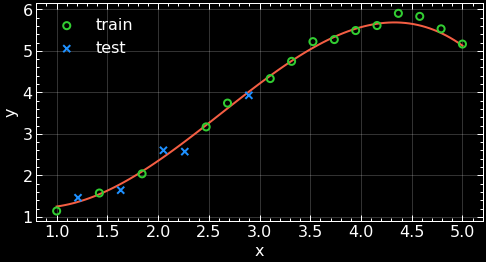

In [194]:
fig, ax = plt.subplots(figsize=(8, 4))
ymin, ymax = 1, 6
x_axis = np.linspace(xmin, xmax, 100)

ax.plot(x_axis, function(x_axis), c='tomato', lw=2, alpha=0.96, )
ax.scatter(X_train, Y_train, s=50, ec='limegreen', fc='none', lw=2, zorder=5, label='train')
ax.scatter(X_test, Y_test, s=50, marker='x', ec='dodgerblue', fc='none', lw=2, zorder=5, label='test')
ax.set(xlabel='x', ylabel='y', #title=f'{sequence}', 
       # xlim=[xmin,xmax], ylim=[ymin,ymax]
      )
ax.grid(lw=1, alpha=0.2, zorder=0)
ax.legend();

In [195]:
# Instantiate a Gaussian Process model
# kernel = ConstantKernel(1.0, (1e-3, 1e5)) * RBF(10, (1e-2, 1e2))
kernel = 1*RBF(length_scale=10, length_scale_bounds=(1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, normalize_y=0)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X_train, Y_train)
print(gp.kernel_)
# Make the prediction on the meshed x-axis (ask for MSE as well)
mean_pred, std_pred = gp.predict(x_axis.reshape(-1, 1), return_std=True)
Yhat = gp.predict(X_test, return_std=0)

3**2 * RBF(length_scale=0.338)


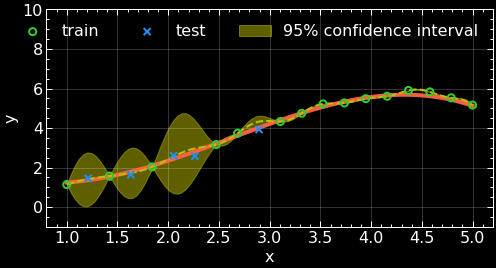

In [197]:
fig, ax = plt.subplots(figsize=(8, 4))
xmin, xmax = 0.8, 5.2
ymin, ymax = -1, 10
x = np.linspace(xmin, xmax, 100)

ax.plot(x_axis, function(x_axis), c='tomato', lw=4, alpha=0.96, )
ax.scatter(X_train, Y_train, s=50, ec='limegreen', fc='none', lw=2, zorder=5, label='train')
ax.scatter(X_test, Y_test, s=50, marker='x', ec='dodgerblue', fc='none', lw=2, zorder=5, label='test')
# ax.scatter(X_test, Yhat, s=50, marker='x', ec='dodgerblue', fc='none', lw=2, zorder=5, label='test')
ax.plot(x_axis, mean_pred, c='y', ls='--', lw=2)
ax.fill_between(
    x_axis.ravel(),
    mean_pred.ravel() - 1.96 * std_pred,
    mean_pred.ravel() + 1.96 * std_pred,
    alpha=0.5,
    label=r"95% confidence interval",
    color='y'
)
ax.set(xlabel='x', ylabel='y', #title=f'{sequence}', 
       xlim=[xmin,xmax], ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0)
ax.legend(ncol=3);

In [198]:
from sklearn.model_selection import cross_val_predict

kernel = 1*RBF(length_scale=10, length_scale_bounds=(1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, normalize_y=0)

Yhat = cross_val_predict(gp, X, Y, cv=X.shape[0])
print(f'{r2_score(Y, Yhat):.2f}')

0.99


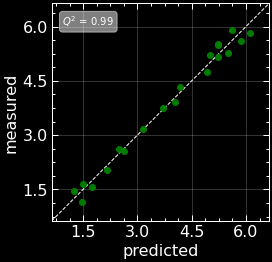

In [199]:
def xminmax(ax, offset=0.05):
    axis = ax.axis()
    xmin, xmax = min(axis[0], axis[2]), max(axis[1], axis[3])
    
    xmin -= (xmax-xmin)*offset
    xmax += (xmax-xmin)*offset
    return xmin, xmax

fig, ax = plt.subplots(figsize=(4, 4))
ax.set_aspect('equal')
ax.scatter(Yhat, Y, color='g', alpha=0.95, zorder=3)
ax.set(xlabel='predicted', ylabel='measured')
ax.grid(lw=1, alpha=0.2, zorder=0)
xmin, xmax = xminmax(ax)
line = [xmin, xmax]
ax.plot(line, line, 'w--', lw=1)
ax.set(xlim=[xmin,xmax], ylim=[xmin,xmax])
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.yaxis.set_major_locator(plt.MaxNLocator(5))
text_box = f'$Q^2$ = {r2_score(Y, Yhat):.2f}'
ax.text(0.05, 0.95, text_box, transform=ax.transAxes, #fontsize=14,
        verticalalignment='top', bbox={'boxstyle':'round', 'facecolor':'w', 'alpha':0.5});

## Gaussian Process with pymc

In [189]:
import pymc3 as pm
import arviz as az

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
with pm.Model() as model:

    # Lengthscale
    ρ = pm.HalfCauchy('ρ', 5)
    η = pm.HalfCauchy('η', 5)
    
    M = pm.gp.mean.Linear(coeffs=(Y/X).mean())
    K = (η**2) * pm.gp.cov.ExpQuad(1, ρ) 
    
    σ = pm.HalfNormal('σ', 50)
    
    recruit_gp = pm.gp.Marginal(mean_func=M, cov_func=K)
    recruit_gp.marginal_likelihood('y', X=X, y=Y, noise=σ)
    gp_trace = pm.sample(1000, tune=2000, cores=2, random_seed=42)

C:\Users\jorge\miniconda3\envs\env-pym3\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


In [ ]:
az.plot_trace(gp_trace, var_names=['ρ', 'η', 'σ']);